# MÓDULO 7: undamentos del Deep Learning


- Nombre alumno: Sebastián Menares Arriaza


# Tema : Redes Neuronales

El conjunto de datos Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, con imágenes en escala de grises de 28x28 de 70 000 productos de moda de 10 categorías y 7000 imágenes por categoría. El conjunto de entrenamiento tiene 60.000 imágenes y el conjunto de prueba tiene 10.000 imágenes. ¡Puede verificar esto más tarde cuando haya cargado sus datos! ;)

Cargar los datos
![imagen_2024-02-29_050458696.png](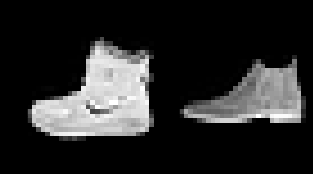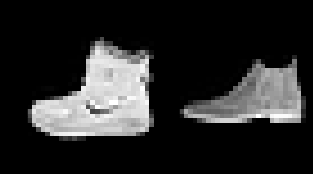)
Keras viene con una biblioteca llamada datasets, que puede usar para cargar conjuntos de datos listos para usar: descarga los datos del servidor y acelera el proceso, ya que ya no tiene que descargar los datos a su computadora. Las imágenes del tren y de la prueba, junto con las etiquetas, se cargan y almacenan en las variables train_X, train_Y, test_X, test_Y, respectivamente

In [12]:
# Instalación o actualización de TensorFlow
# pip install --upgrade tensorflow

from keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

import numpy as np
from tensorflow.keras.utils import to_categorical


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Imprimir la forma de los datos de entrenamiento y prueba
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Realice lo siguiente:
1. Obtenga el tamaño de los datos de test y testeo, además de las dimensiones de las imágenes.
2. Obtenga las categorías de la base
3. Visualice sus datos.
4. Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe convertir su tipo a float32, y también debe volver a escalar los valores de píxel en el rango 0 - 1 inclusive.
5. Convierta las etiquetas de entrenamiento y prueba en vectores de codificación one-hot.
6. Separar datos de entrenamiento y testeo
7. Para modelar sus datos, utilice los siguientes paquetes:
8. Agregue la capa de agrupación máxima con MaxPooling2D() y así
sucesivamente.
9. Compilación y visualización del modelo

Realice lo siguiente:
1. Obtenga el tamaño de los datos de test y testeo, además de las dimensiones de las imágenes.


In [4]:
# Tamaño de los datos de entrenamiento y de prueba
print("Tamaño de los datos de entrenamiento:", train_X.shape, train_Y.shape)
print("Tamaño de los datos de prueba:", test_X.shape, test_Y.shape)

# Dimensiones de las imágenes
image_shape = train_X.shape[1:]
print("Dimensiones de las imágenes:", image_shape)


Tamaño de los datos de entrenamiento: (60000, 28, 28) (60000,)
Tamaño de los datos de prueba: (10000, 28, 28) (10000,)
Dimensiones de las imágenes: (28, 28)


2. Obtenga las categorías de la base


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Categorías de la base:")
for i, category in enumerate(class_names):
    print(f"{i}: {category}")


Categorías de la base:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


In [9]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

unique_labels = np.unique(train_labels)
for label in unique_labels:
    print(f"Clase {label}: {class_names[label]}")



Clase 0: T-shirt/top
Clase 1: Trouser
Clase 2: Pullover
Clase 3: Dress
Clase 4: Coat
Clase 5: Sandal
Clase 6: Shirt
Clase 7: Sneaker
Clase 8: Bag
Clase 9: Ankle boot


In [40]:
# Encontrar los números únicos de las etiquetas de entrenamiento
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [41]:

# Mostrar imágenes de entrenamiento y prueba
plt.figure(figsize=[5,5])

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

3. Visualice sus datos.



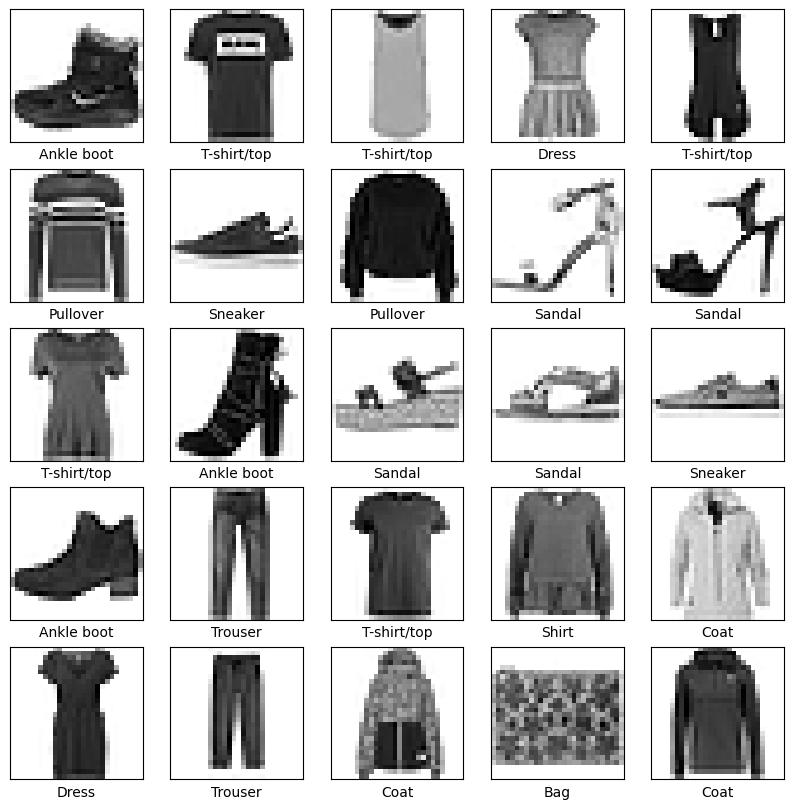

In [11]:
import matplotlib.pyplot as plt

# Definir nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar algunas imágenes junto con sus etiquetas
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()


Text(0.5, 1.0, 'Ground Truth : 9')

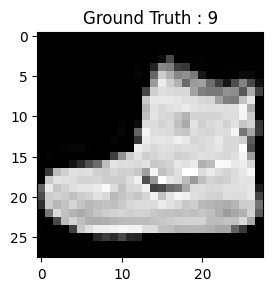

In [42]:
# Mostrar la primera imagen en los datos de entrenamiento
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

Text(0.5, 1.0, 'Ground Truth : 9')

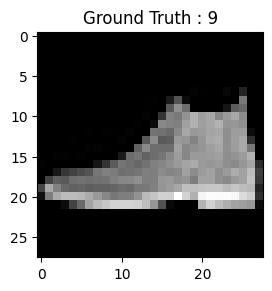

In [43]:
# Mostrar la primera imagen en los datos de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

4. Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe convertir su tipo a float32, y también debe volver a escalar los valores de píxel en el rango 0 - 1 inclusive.


In [44]:

# Cambiar forma de imagen
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [13]:
# Convertir las imágenes de entrenamiento y prueba a matrices 28x28x1 y escalar los valores de píxel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255


In [ ]:
# Convertir las imágenes de entrenamiento y prueba a matrices 28x28x1 y escalar los valores de píxel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_X.reshape((test_Y.shape[0], 28, 28, 1)).astype('float32') / 255


In [14]:
print("Dimensiones de las imágenes de entrenamiento:", train_images.shape)
print("Dimensiones de las imágenes de prueba:", test_images.shape)


Dimensiones de las imágenes de entrenamiento: (60000, 28, 28, 1)
Dimensiones de las imágenes de prueba: (10000, 28, 28, 1)


5. Convierta las etiquetas de entrenamiento y prueba en vectores de codificación one-hot.


In [15]:
from keras.utils import to_categorical

# Convertir las etiquetas de entrenamiento y prueba en vectores one-hot
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


6. Separar datos de entrenamiento y testeo
  

In [17]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Cargar los datos de Fashion MNIST
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Comprobar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)



Dimensiones de X_train: (48000, 28, 28, 1)
Dimensiones de y_train: (48000,)
Dimensiones de X_test: (12000, 28, 28, 1)
Dimensiones de y_test: (12000,)


7. Para modelar sus datos, utilice los siguientes paquetes:

In [23]:
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU



In [24]:
# Importar las bibliotecas necesarias de Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU


In [25]:
# Definir el modelo
model = Sequential()

Usará un tamaño de lote de 64 y también es preferible usar un tamaño de lote más alto de 128 o 256, todo depende de la memoria. Contribuye enormemente a determinar los parámetros de aprendizaje y afecta la precisión de la predicción. Entrenarás la red durante 20 épocas.

In [26]:
batch_size = 64
epochs = 20
num_classes = 10


8. Agregue la capa de agrupación máxima con MaxPooling2D() y así
sucesivamente.


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crear el modelo
model = Sequential()

# Agregar la primera capa convolucional
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

# Agregar la capa de agrupación máxima
model.add(MaxPooling2D(pool_size=(2, 2)))

# Agregar más capas convolucionales y de agrupación máxima si es necesario
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar los datos para la capa densa
model.add(Flatten())

# Agregar capas densas para la clasificación
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Capa de salida con 10 neuronas para las 10 clases

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Imprimir un resumen del modelo
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

9. Compilación y visualización del modelo

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

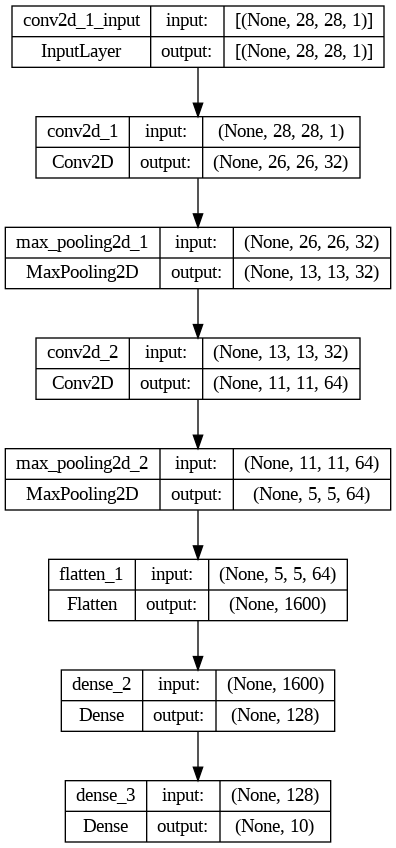

In [29]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Visualizar el modelo
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [31]:
# Cargar los datos de entrenamiento y prueba
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocesamiento de los datos
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train /= 255
X_test /= 255

# Convertir las etiquetas a one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Definir el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))


Epoch 1/20
938/938 [==============================] - 59s 61ms/step - loss: 0.4875 - accuracy: 0.8233 - val_loss: 0.3813 - val_accuracy: 0.8629
Epoch 2/20
938/938 [==============================] - 50s 53ms/step - loss: 0.3221 - accuracy: 0.8822 - val_loss: 0.3385 - val_accuracy: 0.8790
Epoch 3/20
938/938 [==============================] - 51s 54ms/step - loss: 0.2755 - accuracy: 0.8989 - val_loss: 0.2878 - val_accuracy: 0.8954
Epoch 4/20
938/938 [==============================] - 51s 54ms/step - loss: 0.2438 - accuracy: 0.9091 - val_loss: 0.2703 - val_accuracy: 0.9009
Epoch 5/20
938/938 [==============================] - 51s 55ms/step - loss: 0.2190 - accuracy: 0.9192 - val_loss: 0.2776 - val_accuracy: 0.9011
Epoch 6/20
938/938 [==============================] - 49s 53ms/step - loss: 0.1969 - accuracy: 0.9267 - val_loss: 0.2518 - val_accuracy: 0.9058
Epoch 7/20
938/938 [==============================] - 49s 52ms/step - loss: 0.1778 - accuracy: 0.9337 - val_loss: 0.2585 - val_accuracy:

In [34]:
# Probar el modelo
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Predecir etiquetas
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Convertir y_test de nuevo a etiquetas de clase única
y_test_single = np.argmax(y_test, axis=1)

# Graficar etiquetas correctas e incorrectas
correct = np.where(predicted_classes == y_test_single)[0]
incorrect = np.where(predicted_classes != y_test_single)[0]

# Reporte de clasificación
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test_single, predicted_classes, target_names=target_names))



Test loss: 0.435533732175827
Test accuracy: 0.9090999960899353
313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

     Class 0       0.87      0.82      0.85      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.86      0.86      0.86      1000
     Class 3       0.93      0.89      0.91      1000
     Class 4       0.88      0.84      0.86      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.69      0.80      0.74      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [39]:
# Probar el modelo
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Predecir etiquetas
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

# Graficar etiquetas correctas e incorrectas
correct = np.where(predicted_classes == y_test_single)[0]
incorrect = np.where(predicted_classes != y_test_single)[0]

# Reporte de clasificación
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test_single, predicted_classes, target_names=target_names))

# Conclusiones
print("Conclusiones:")
print("1. Precisión del Modelo: La precisión del modelo en los datos de prueba es del {:.2f}%.".format(test_eval[1] * 100))
print("2. Matriz de Confusión: Se puede analizar la matriz de confusión para comprender cómo se distribuyen las predicciones del modelo en cada clase.")
print("3. Clases Mal Clasificadas: Al observar las imágenes de las clases mal clasificadas, se pueden identificar patrones comunes o características específicas que podrían causar confusiones.")
print("4. Métricas Adicionales: Además de la precisión, también se pueden analizar otras métricas como precisión, recuperación y F1-score para obtener una comprensión más completa del rendimiento del modelo.")
print("5. Generalización del Modelo: Es importante evaluar cómo se generaliza el modelo a datos nuevos y no vistos. Un buen rendimiento tanto en los datos de entrenamiento como en los de prueba sugiere que el modelo está generalizando bien y no está sobreajustando los datos de entrenamiento.")

# Mensajes de clasificación correcta e incorrecta
print("\nMensajes de clasificación:")
for idx in correct[:3]:
    print("Predicción correcta para la imagen {}: Clase predicha: {}, Clase real: {}".format(idx, predicted_classes[idx], y_test[idx]))
for idx in incorrect[:3]:
    print("Predicción incorrecta para la imagen {}: Clase predicha: {}, Clase real: {}".format(idx, predicted_classes[idx], y_test_single[idx]))


Test loss: 0.435533732175827
Test accuracy: 0.9090999960899353
313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.83      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.86      0.86      0.86      1000
     Class 3       0.93      0.89      0.91      1000
     Class 4       0.88      0.83      0.86      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.70      0.80      0.75      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Conclusiones:
1. Precisión del Modelo: La precisión del modelo en los datos de prueba es del 90.91%.
2. Matriz de Confusió

# Recursos Bibliográficos:

[1] [Qué es el Deep Learning](https://www.youtube.com/watch?v=s0SbvGiG28w)

[2] [Diferencias: Machine learning, Deep learning e Inteligencia artificial](https://www.youtube.com/watch?v=THrgrb-3lsM)

[3] [Inteligencia artificial](https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning#:~:text=Artificial%20Intelligence%20is%20the%20concept,algorithms%20to%20train%20a%20model.)

[4] [Neural netwoks](https://www.ibm.com/cloud/learn/neural-networks)

[5] [Aplicaciones de Redes neuronales](https://www.datacentric.es/blog/insight/red-neuronal-artificial-aplicaciones/)

